In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [7]:
# Step 1: Load the Dataset
file_path = r'D:\mnt\data\HousePricePrediction.xlsx'  # Correct path to the uploaded file
df = pd.read_excel(file_path)

In [8]:
print("Dataset:")
print(df.head())


Dataset:
   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [12]:
df_clean = df.dropna(subset=["SalePrice"])

In [16]:
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64


In [17]:
X = df_clean[["LotArea"]]  # Features
y = df_clean["SalePrice"]  # Target


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
model = LinearRegression()  # Initialize the Linear Regression model
model.fit(X_train, y_train) 

LinearRegression()

In [20]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.2f}")
print(f"Model Coefficient: {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")



Mean Squared Error: 7189094014.83
Model Coefficient: 1.91
Model Intercept: 161006.99


In [21]:
comparison = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
print("\nActual vs Predicted:")
print(comparison)


Actual vs Predicted:
       Actual      Predicted
0    154500.0  177091.375138
1    325000.0  184435.825624
2    115000.0  178135.120574
3    159000.0  170565.098730
4    315500.0  185663.086742
..        ...            ...
287   89471.0  172333.348782
288  260000.0  191894.973411
289  189000.0  176680.376477
290  108000.0  178372.161662
291  124500.0  176529.358365

[292 rows x 2 columns]


In [22]:
import matplotlib.pyplot as plt


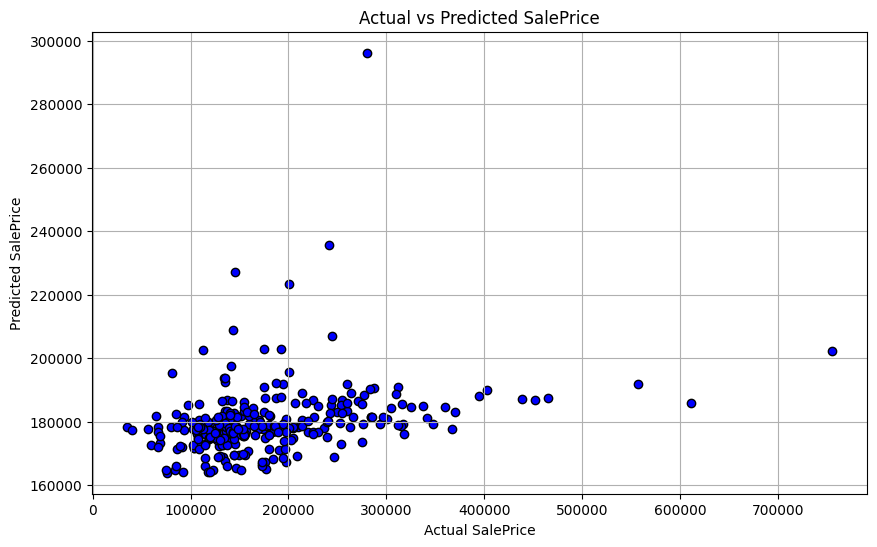

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black')
plt.title('Actual vs Predicted SalePrice')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.grid(True)
plt.show()


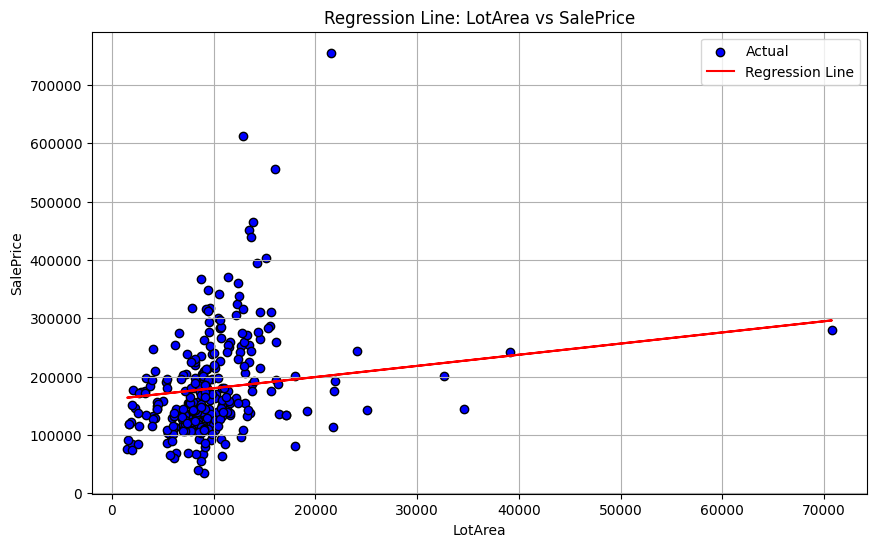

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', edgecolor='black', label='Actual')
plt.plot(X_test, model.predict(X_test), color='red', label='Regression Line')
plt.title('Regression Line: LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.legend()
plt.grid(True)
plt.show()